In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


In [2]:

# Load the data
benin_data = pd.read_csv('data/benin-malanville.csv')
togo_data = pd.read_csv('data/togo-dapaong_qc.csv')
sierraleone_data = pd.read_csv('data/sierraleone-bumbuna.csv')



In [4]:
# Check the original data before dropping rows
print(benin_data[['GHI', 'DNI', 'DHI']].head())
print(togo_data[['GHI', 'DNI', 'DHI']].head())
print(sierraleone_data[['GHI', 'DNI', 'DHI']].head())


   GHI  DNI  DHI
0 -1.2 -0.2 -1.1
1 -1.1 -0.2 -1.1
2 -1.1 -0.2 -1.1
3 -1.1 -0.1 -1.0
4 -1.0 -0.1 -1.0
   GHI  DNI  DHI
0 -1.3  0.0  0.0
1 -1.3  0.0  0.0
2 -1.3  0.0  0.0
3 -1.2  0.0  0.0
4 -1.2  0.0  0.0
   GHI  DNI  DHI
0 -0.7 -0.1 -0.8
1 -0.7 -0.1 -0.8
2 -0.7 -0.1 -0.8
3 -0.7  0.0 -0.8
4 -0.7 -0.1 -0.8


In [5]:
def check_null_values(data):
    
    # Calculate the count of missing values
    null_count = data.isnull().sum()
    
    # Calculate the percentage of missing values
    null_percentage = (data.isnull().sum() / len(data)) * 100
    
    # Combine the count and percentage into a DataFrame
    null_report = pd.DataFrame({
        'Missing Values': null_count,
        'Percentage (%)': null_percentage
    })
    
    # Filter to show only columns that have missing values
    null_report = null_report[null_report['Missing Values'] > 0]
    
    return null_report

# Example usage:
benin_nulls = check_null_values(benin_data)
togo_nulls = check_null_values(togo_data)
sierraleone_nulls = check_null_values(sierraleone_data)

print("Benin Malanville Null Values:\n", benin_nulls)
print("\nTogo Dapaong Null Values:\n", togo_nulls)
print("\nSierra Leone Bumbuna Null Values:\n", sierraleone_nulls)


Benin Malanville Null Values:
           Missing Values  Percentage (%)
Comments          525600           100.0

Togo Dapaong Null Values:
           Missing Values  Percentage (%)
Comments          525600           100.0

Sierra Leone Bumbuna Null Values:
           Missing Values  Percentage (%)
Comments          525600           100.0


In [6]:
def convert_to_datetime(df, column_name='Timestamp'):
    
    try:
        df[column_name] = pd.to_datetime(df[column_name], errors='coerce')
        print(f"Successfully converted {column_name} to datetime.")
    except KeyError:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
    except Exception as e:
        print(f"An error occurred while converting {column_name} to datetime: {e}")
    
    # Return the DataFrame with the converted column
    return df

# Example usage:
benin_data = convert_to_datetime(benin_data, 'Timestamp')
togo_data = convert_to_datetime(togo_data, 'Timestamp')
sierraleone_data = convert_to_datetime(sierraleone_data, 'Timestamp')


Successfully converted Timestamp to datetime.
Successfully converted Timestamp to datetime.
Successfully converted Timestamp to datetime.


In [7]:

def extract_datetime_components(df, timestamp_column='Timestamp'):
    
    if timestamp_column in df.columns:
        # Ensure the column is in datetime format
        df[timestamp_column] = pd.to_datetime(df[timestamp_column], errors='coerce')
        
        # Extract Year, Month, Day, and Hour components
        df["Year"] = df[timestamp_column].dt.year
        df["Month"] = df[timestamp_column].dt.month
        df["Day"] = df[timestamp_column].dt.day
        df["Hour"] = df[timestamp_column].dt.time  # Extracts the hour, not the time object
        
        print(f"Successfully extracted Year, Month, Day, and Hour from '{timestamp_column}'.")
    else:
        print(f"Column '{timestamp_column}' not found in the DataFrame.")
    
    return df

# Example usage:
benin_data = extract_datetime_components(benin_data, 'Timestamp')
togo_data = extract_datetime_components(togo_data, 'Timestamp')
sierraleone_data = extract_datetime_components(sierraleone_data, 'Timestamp')


Successfully extracted Year, Month, Day, and Hour from 'Timestamp'.
Successfully extracted Year, Month, Day, and Hour from 'Timestamp'.
Successfully extracted Year, Month, Day, and Hour from 'Timestamp'.


In [29]:
# benin_data.head(10)

### Negative values for 'GHI' (Global Horizontal Irradiance), 'DNI' (Direct Normal Irradiance), and 'DHI' (Diffuse Horizontal Irradiance) are not physically meaningful since solar radiation cannot be negative. To handle this issue, you can employ the following strategies:¶

###3Replace Negative Values with Zero


In [8]:
def replace_negative_values(df, columns):
    
    for column in columns:
        if column in df.columns:
            # Apply a lambda function to replace negative values with 0
            df[column] = df[column].apply(lambda x: max(x, 0))
            print(f"Replaced negative values in '{column}' with 0.")
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    
    return df

# Example usage:
columns_to_fix = ['GHI', 'DNI', 'DHI']
benin_data = replace_negative_values(benin_data, columns_to_fix)
togo_data = replace_negative_values(togo_data, columns_to_fix)
sierraleone_data = replace_negative_values(sierraleone_data, columns_to_fix)


Replaced negative values in 'GHI' with 0.
Replaced negative values in 'DNI' with 0.
Replaced negative values in 'DHI' with 0.
Replaced negative values in 'GHI' with 0.
Replaced negative values in 'DNI' with 0.
Replaced negative values in 'DHI' with 0.
Replaced negative values in 'GHI' with 0.
Replaced negative values in 'DNI' with 0.
Replaced negative values in 'DHI' with 0.


In [18]:
# benin_data.head(10)

In [9]:
def print_summary_statistics(df, country_name, columns=['GHI', 'DNI', 'DHI']):
    
    try:
        # Check if the columns exist in the DataFrame
        for column in columns:
            if column not in df.columns:
                raise KeyError(f"Column '{column}' not found in the DataFrame.")
        
        # Print the summary statistics for the specified columns
        print(f"Summary Statistics for {country_name}:")
        print(df[columns].describe())
        
    except KeyError as e:
        print(e)

# Example usage:
print_summary_statistics(benin_data, "Benin Malanville")
print_summary_statistics(togo_data, "Togo Dapaong")
print_summary_statistics(sierraleone_data, "Sierra Leone Bumbuna")


Summary Statistics for Benin Malanville:
                 GHI            DNI            DHI
count  525600.000000  525600.000000  525600.000000
mean      241.958821     167.441866     116.993033
std       330.101787     261.547532     157.463619
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         1.800000       0.000000       1.600000
75%       483.400000     314.200000     216.300000
max      1413.000000     952.300000     759.200000
Summary Statistics for Togo Dapaong:
                 GHI            DNI            DHI
count  525600.000000  525600.000000  525600.000000
mean      231.718786     151.258469     116.444352
std       321.691953     250.956962     156.520714
min         0.000000       0.000000       0.000000
25%         0.000000       0.000000       0.000000
50%         2.100000       0.000000       2.500000
75%       442.400000     246.400000     215.700000
max      1424.000000    1004.500000     805.700000
Summ

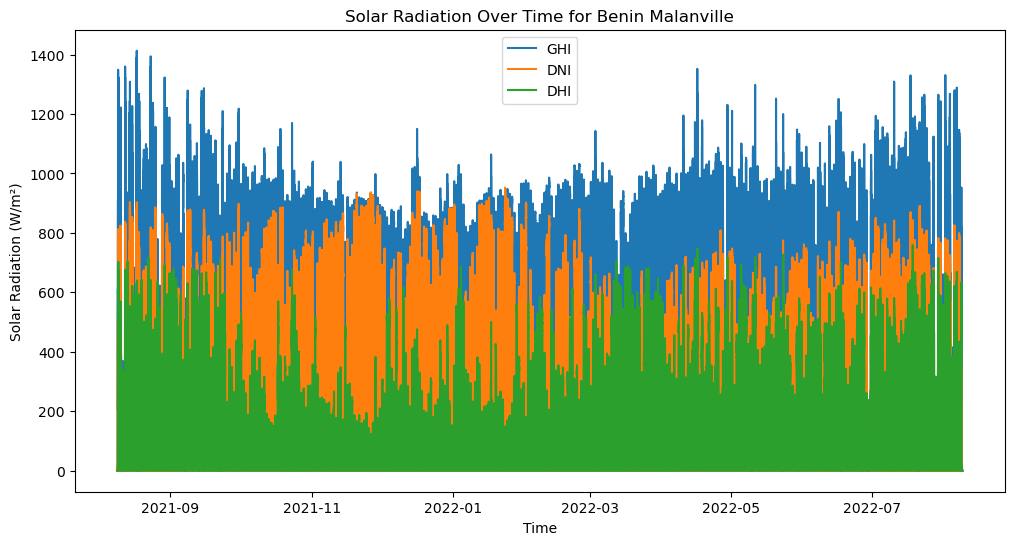

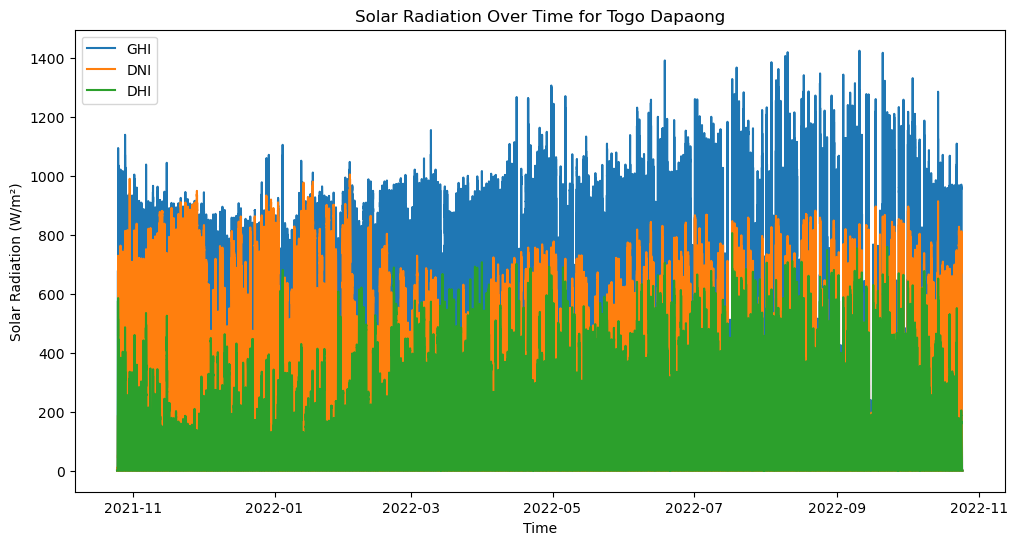

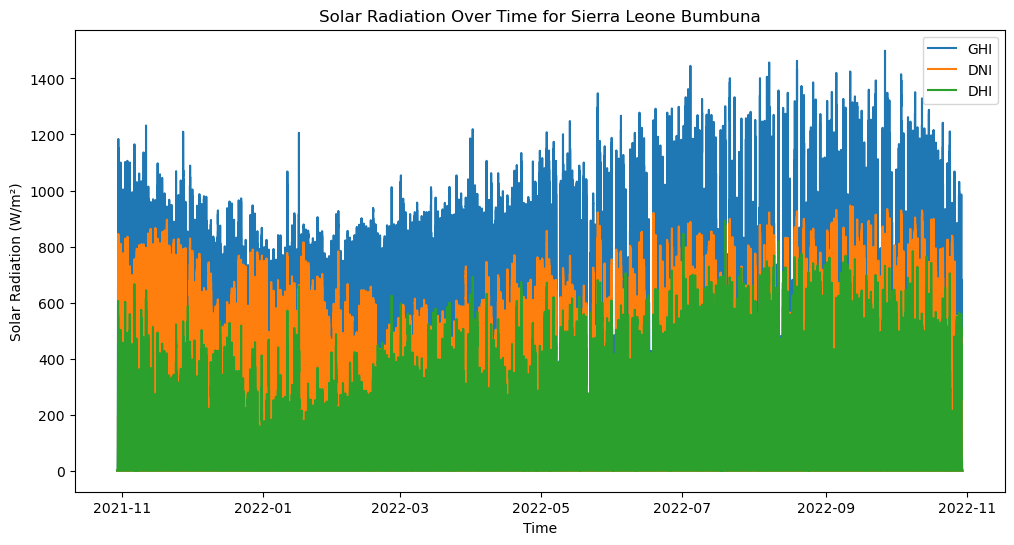

In [10]:
def plot_time_series(df, country_name, timestamp_column='Timestamp', columns=['GHI', 'DNI', 'DHI']):
   
    if timestamp_column in df.columns:
        try:
            df[timestamp_column] = pd.to_datetime(df[timestamp_column])
        except Exception as e:
            print(f"Error converting '{timestamp_column}' to datetime: {e}")
            return
        
        plt.figure(figsize=(12, 6))
        for column in columns:
            if column in df.columns:
                plt.plot(df[timestamp_column], df[column], label=column)
            else:
                print(f"Column '{column}' not found in the DataFrame.")
        
        plt.xlabel('Time')
        plt.ylabel('Solar Radiation (W/m²)')
        plt.title(f'Solar Radiation Over Time for {country_name}')
        plt.legend()
        plt.show()
    else:
        print(f"Column '{timestamp_column}' not found in the DataFrame.")

# Example usage:
plot_time_series(benin_data, "Benin Malanville", 'Timestamp', ['GHI', 'DNI', 'DHI'])
plot_time_series(togo_data, "Togo Dapaong", 'Timestamp', ['GHI', 'DNI', 'DHI'])
plot_time_series(sierraleone_data, "Sierra Leone Bumbuna", 'Timestamp', ['GHI', 'DNI', 'DHI'])


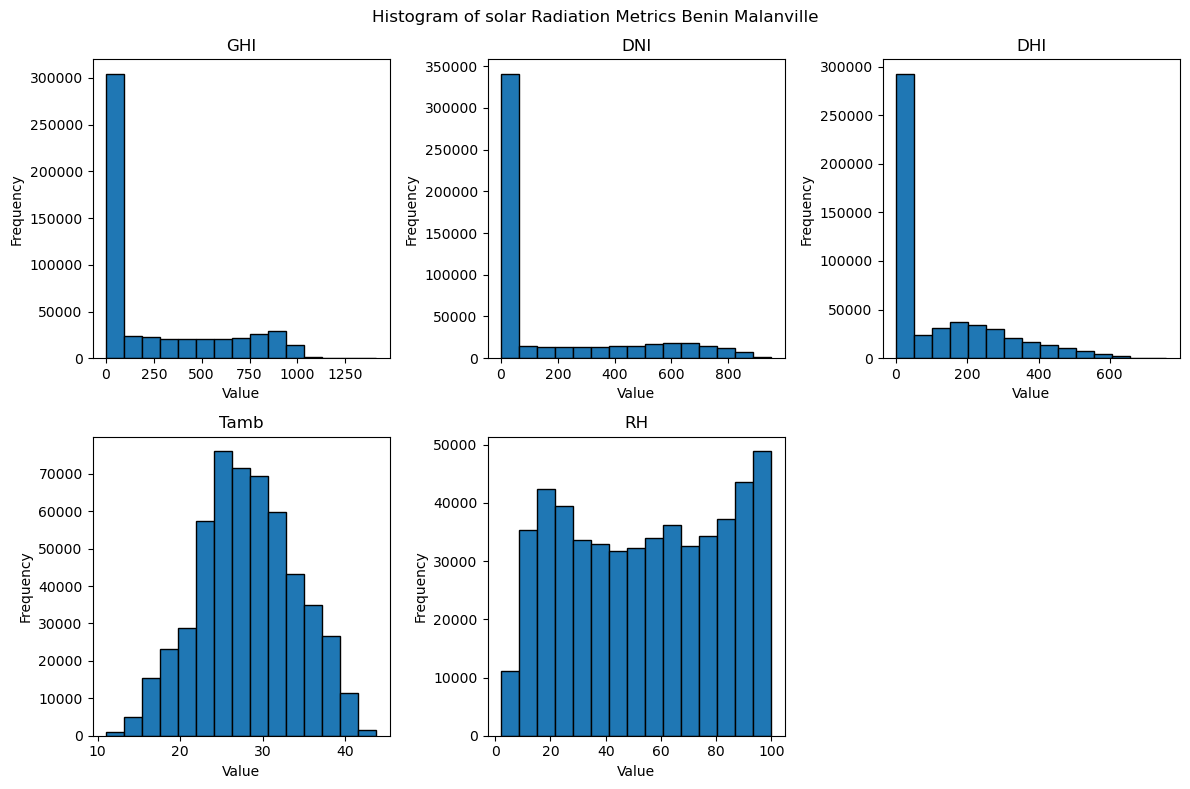

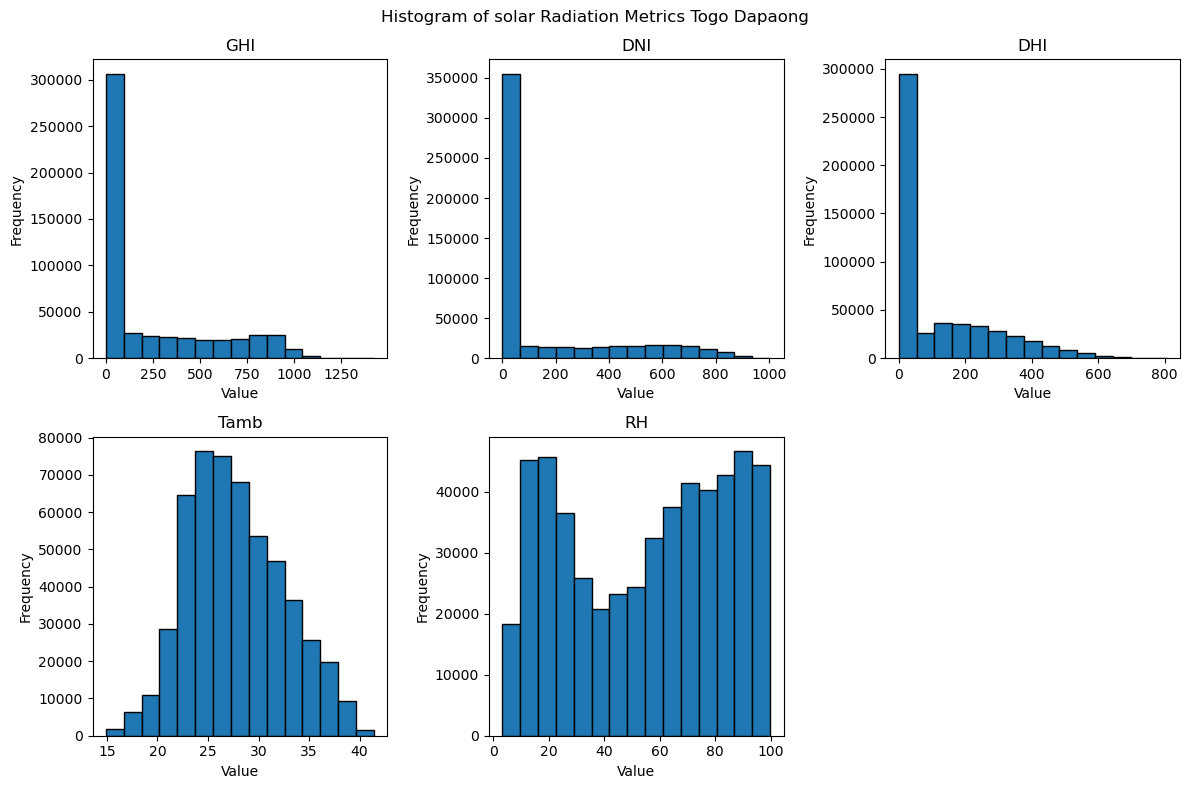

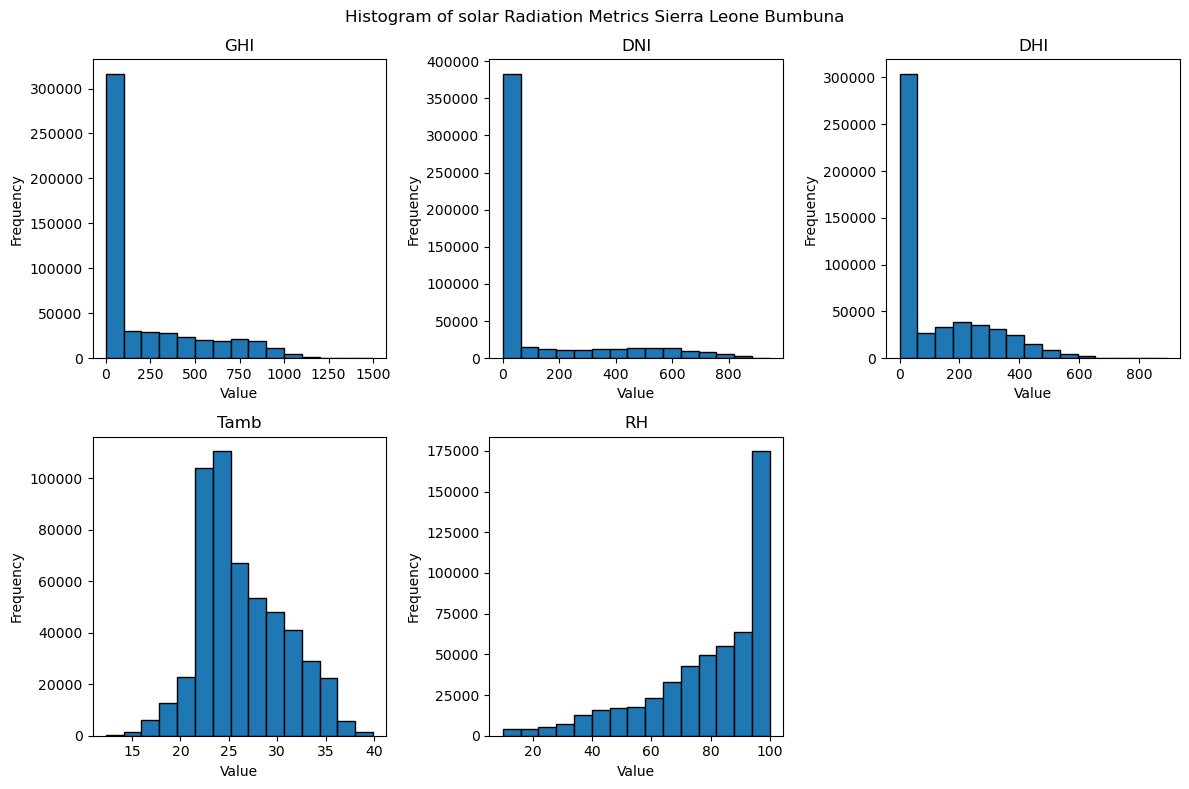

In [11]:
def plot_histograms(df, country_name, columns, bins=15, figsize=(12, 8)):
   
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Calculate number of rows needed, with up to 3 histograms per row

    plt.figure(figsize=figsize)
    
    for i, column in enumerate(columns):
        if column in df.columns:
            plt.subplot(num_rows, 3, i + 1)  # Create subplot for each column
            plt.hist(df[column].dropna(), bins=bins, edgecolor='black')
            plt.suptitle(f'Histogram of solar Radiation Metrics {country_name}')
            plt.title(f'{column}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
        else:
            print(f"Column '{column}' not found in the DataFrame.")
    
    plt.tight_layout()  # Adjust subplots to fit into figure area.
    plt.show()

# Example usage:
plot_histograms(benin_data, 'Benin Malanville', ['GHI', 'DNI', 'DHI', 'Tamb', 'RH'])
plot_histograms(togo_data, 'Togo Dapaong', ['GHI', 'DNI', 'DHI', 'Tamb', 'RH'])
plot_histograms(sierraleone_data, 'Sierra Leone Bumbuna', ['GHI', 'DNI', 'DHI', 'Tamb', 'RH'])



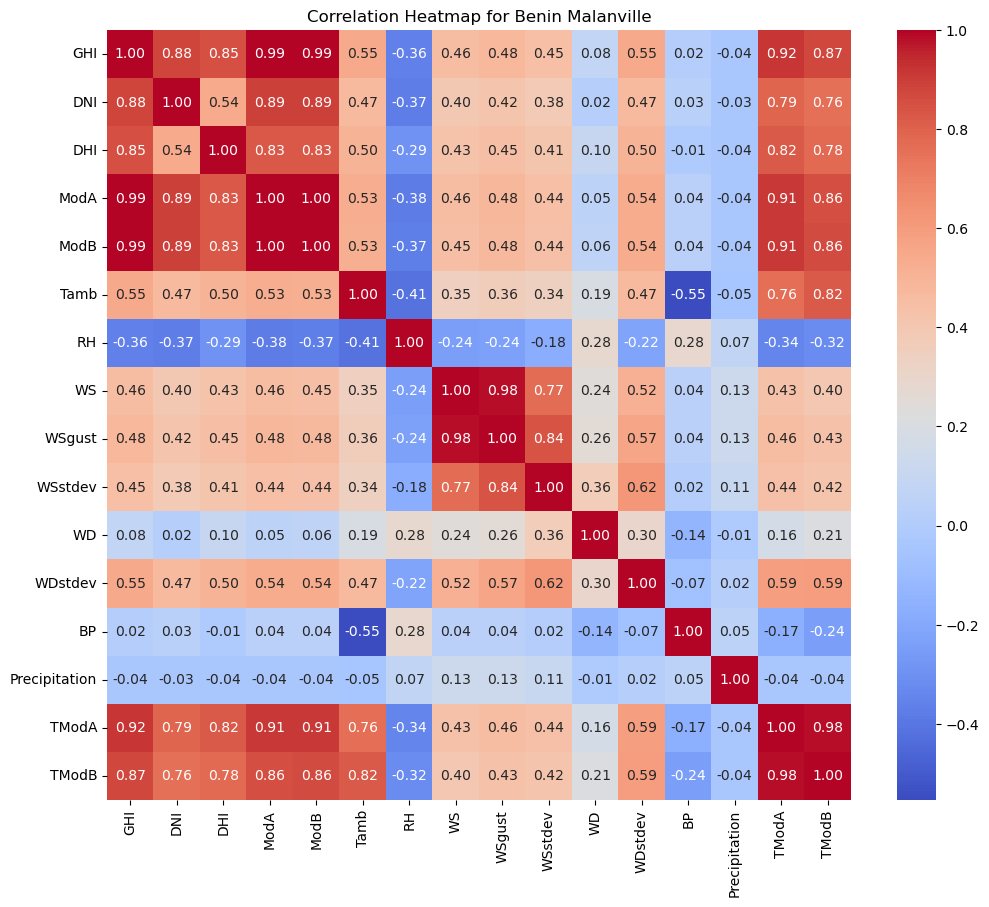

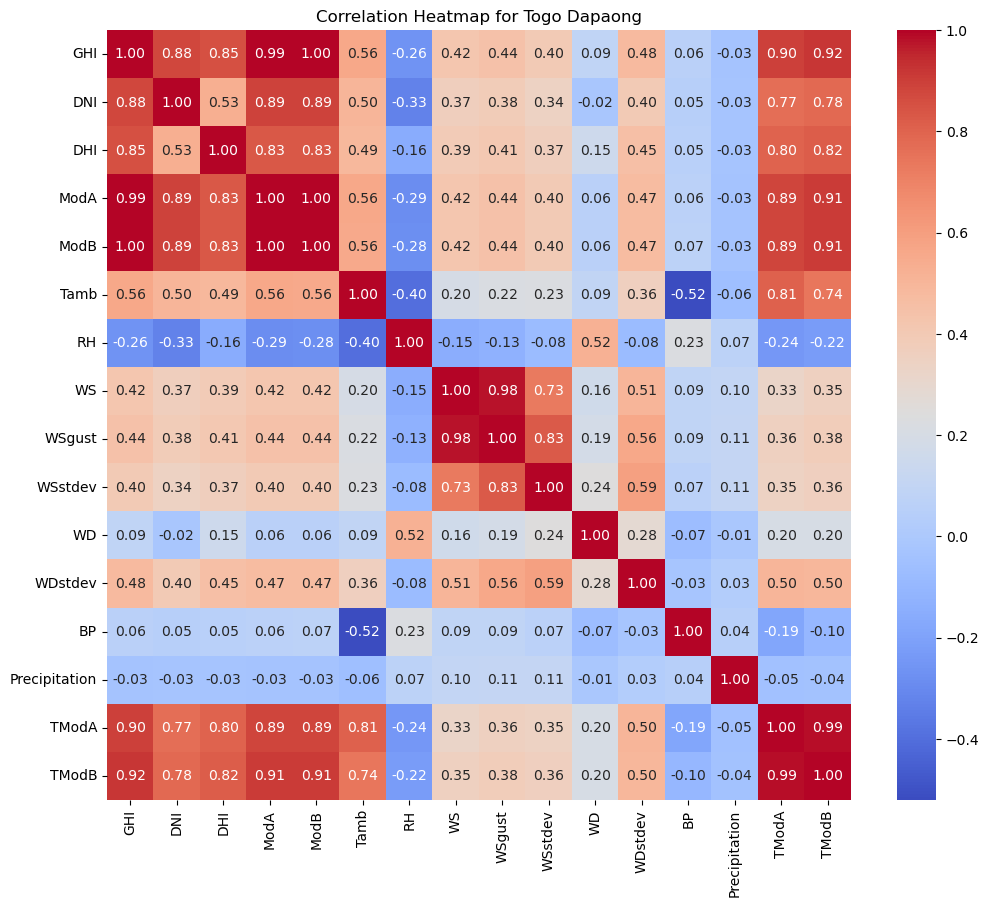

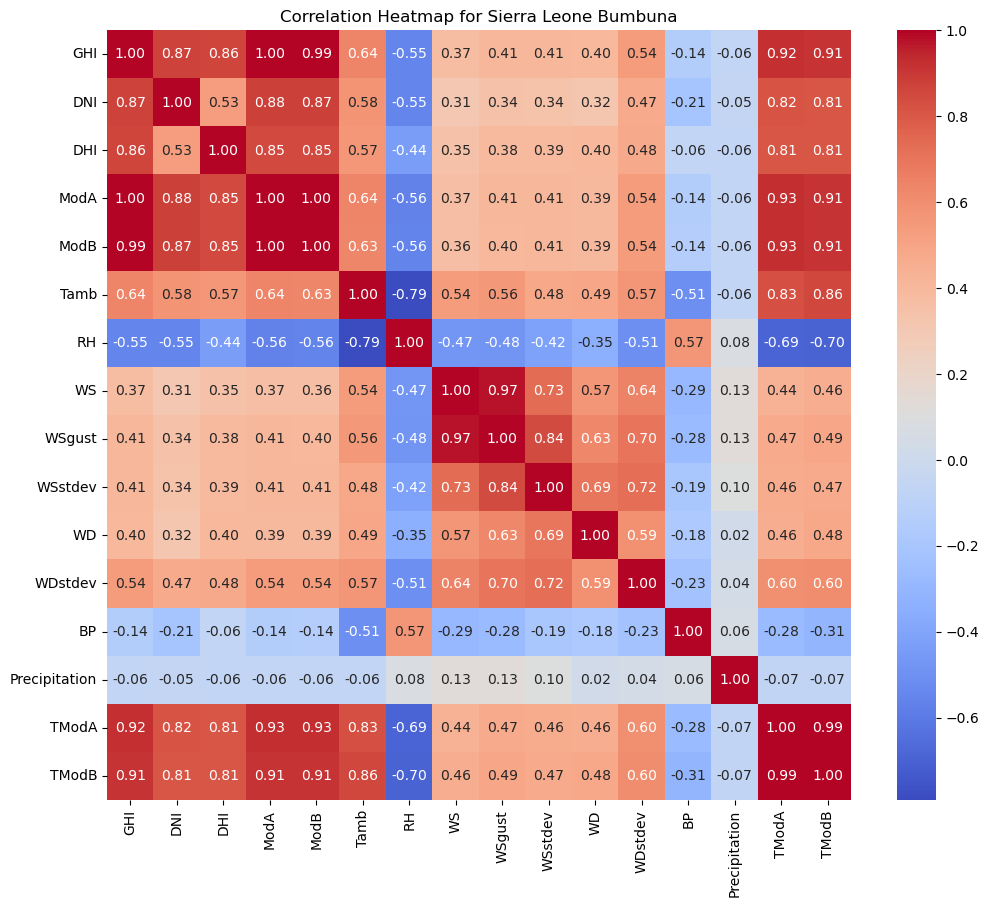

In [22]:

def plot_correlation_heatmap(df, country_name, columns=None):
    if columns is None:
        columns = df.columns.tolist()  # Use all columns if none are specified
    
    # Check if all columns are in the DataFrame
    missing_columns = [col for col in columns if col not in df.columns]
    if missing_columns:
        print(f"Columns {missing_columns} not found in the DataFrame.")
        return
    
    # Calculate the correlation matrix
    correlation_matrix = df[columns].corr()
    
    # Plotting
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title(f'Correlation Heatmap for {country_name}')
    plt.show()

# Example usage:
plot_correlation_heatmap(benin_data, 'Benin Malanville', columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB'])
plot_correlation_heatmap(togo_data, 'Togo Dapaong', columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP','Precipitation', 'TModA', 'TModB'])
plot_correlation_heatmap(sierraleone_data, 'Sierra Leone Bumbuna', columns=['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS', 'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Precipitation', 'TModA', 'TModB'])


In [23]:
def assign_country(df, country_name):
   
    df['Country'] = country_name
    return df


# Assign country names
benin_data = assign_country(benin_data, 'Benin malanville')
sierraleone_data = assign_country(sierraleone_data, 'sierra leone bumbuna')
togo_data = assign_country(togo_data, 'Togo dapaong')



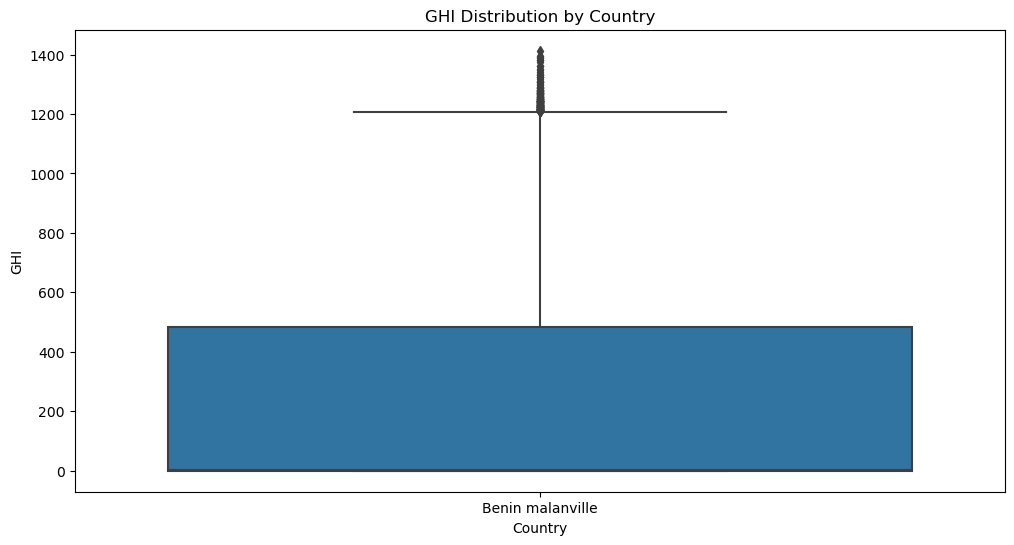

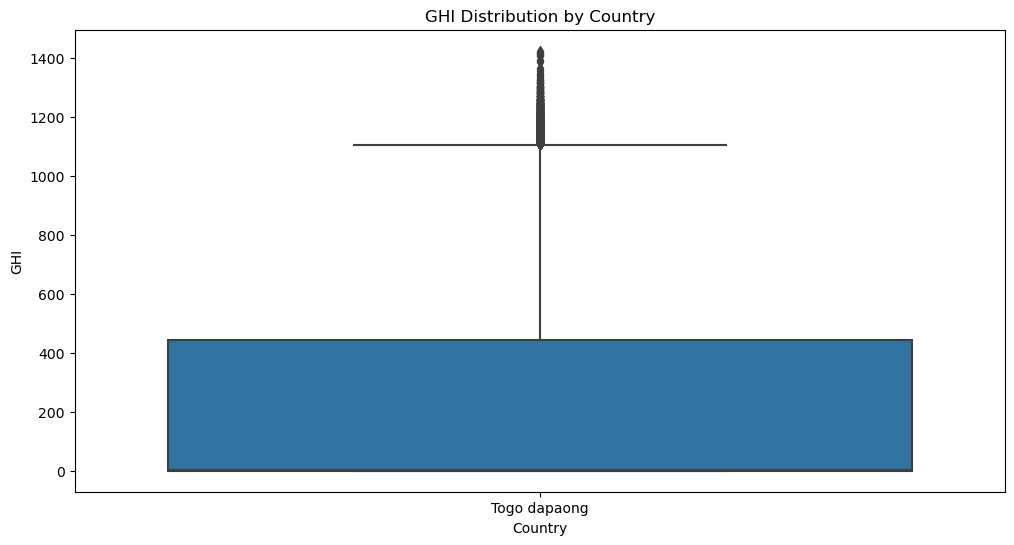

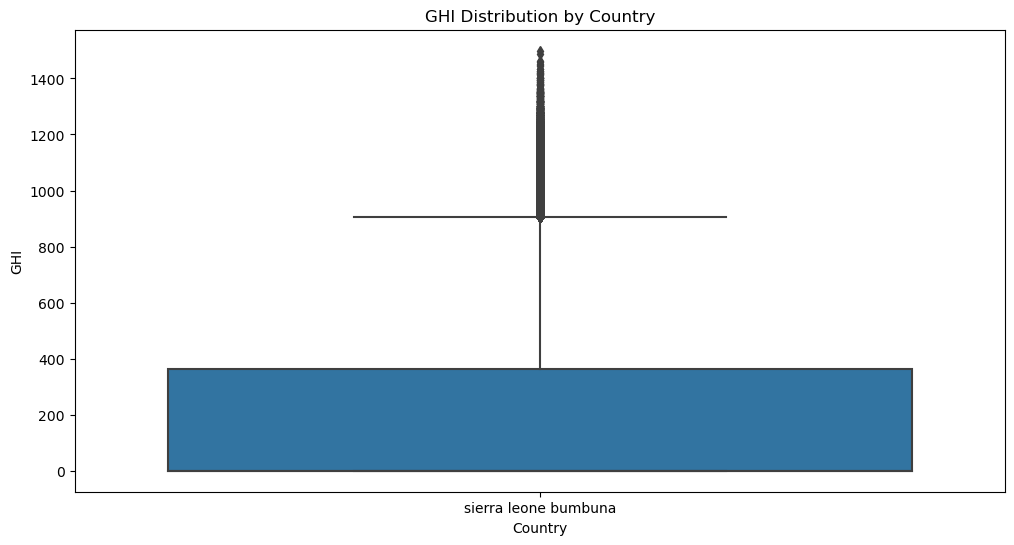

In [24]:

def plot_boxplot_by_country(df, country_column='Country', value_column='GHI'):
   
    if country_column not in df.columns or value_column not in df.columns:
        print(f"Columns '{country_column}' or '{value_column}' not found in the DataFrame.")
        return
    
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=country_column, y=value_column, data=df)
    plt.title(f"{value_column} Distribution by Country")
    plt.xlabel('Country')
    plt.ylabel(value_column)
    plt.show()

# Example usage:
plot_boxplot_by_country(benin_data, country_column='Country', value_column='GHI')
plot_boxplot_by_country(togo_data, country_column='Country', value_column='GHI')
plot_boxplot_by_country(sierraleone_data, country_column='Country', value_column='GHI')

#### Sensor Comparison

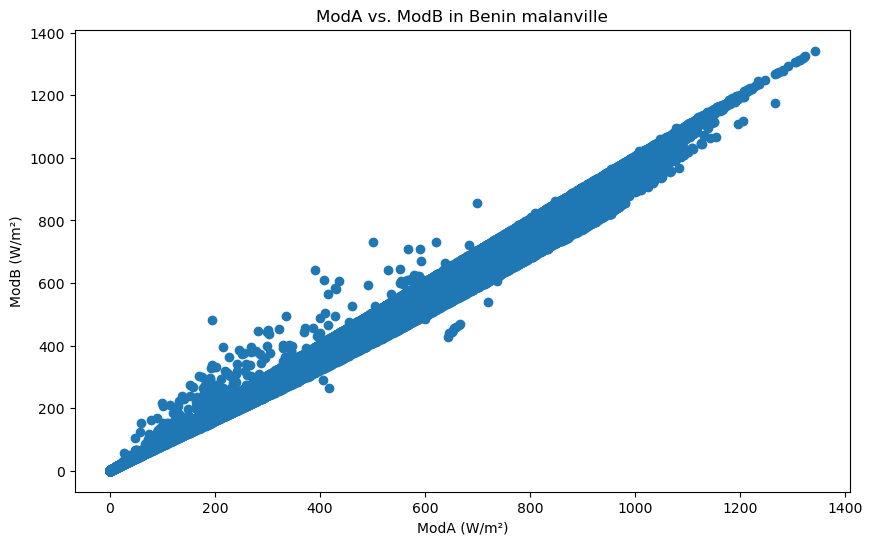

Correlation between ModA and ModB for Benin malanville:
          ModA      ModB
ModA  1.000000  0.998745
ModB  0.998745  1.000000


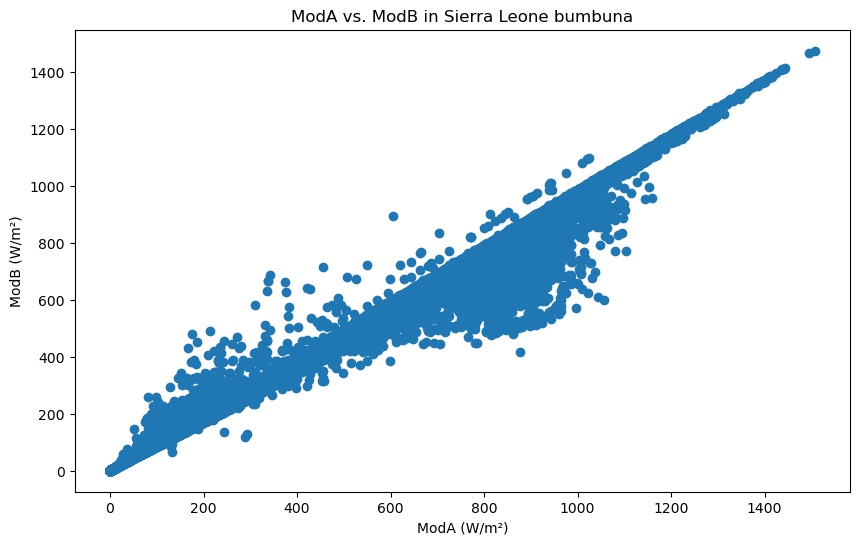

Correlation between ModA and ModB for Sierra Leone bumbuna:
          ModA      ModB
ModA  1.000000  0.999127
ModB  0.999127  1.000000


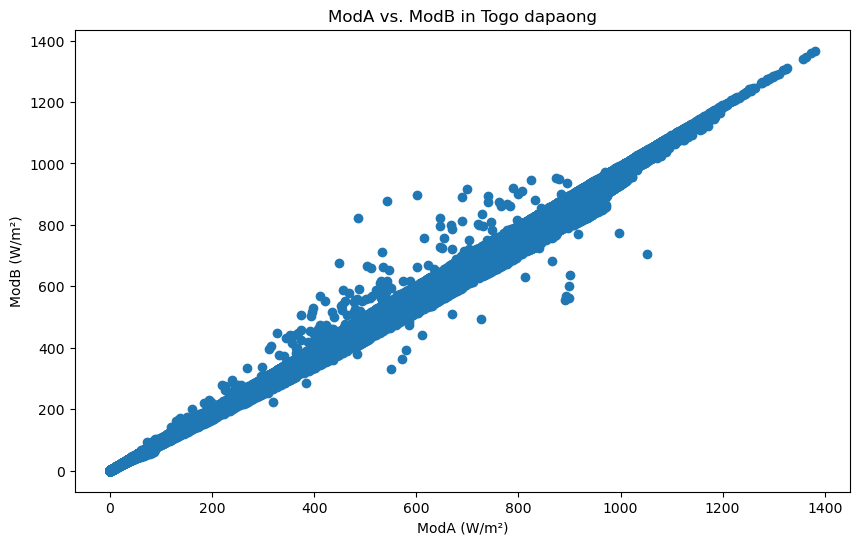

Correlation between ModA and ModB for Togo dapaong:
          ModA      ModB
ModA  1.000000  0.999564
ModB  0.999564  1.000000


In [25]:

def compare_mods(df, country_name):
    
    # Check if 'ModA' and 'ModB' columns are present in the DataFrame
    if 'ModA' not in df.columns or 'ModB' not in df.columns:
        print(f"Columns 'ModA' and 'ModB' not found in the DataFrame for {country_name}.")
        return
    
    # Scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(df['ModA'], df['ModB'])
    plt.xlabel('ModA (W/m²)')
    plt.ylabel('ModB (W/m²)')
    plt.title(f'ModA vs. ModB in {country_name}')
    plt.show()
    
    # Calculate correlation
    mod_correlation = df[['ModA', 'ModB']].corr()
    print(f"Correlation between ModA and ModB for {country_name}:")
    print(mod_correlation)



# Call function for each dataset
compare_mods(benin_data, 'Benin malanville')
compare_mods(sierraleone_data, 'Sierra Leone bumbuna')
compare_mods(togo_data, 'Togo dapaong')




In [26]:
def correlation_with_ghi(df, variables, country_name):
    
    # Check if 'GHI' is in the DataFrame
    if 'GHI' not in df.columns:
        print(f"'GHI' column not found in the DataFrame for {country_name}.")
        return
    
    # Add 'GHI' to the list of variables to ensure it is included in the correlation calculation
    variables_with_ghi = ['GHI'] + variables
    
    # Check if all specified variables are in the DataFrame
    missing_variables = [var for var in variables if var not in df.columns]
    if missing_variables:
        print(f"Columns {missing_variables} not found in the DataFrame for {country_name}.")
        return
    
    # Calculate the correlation matrix and extract the correlation with 'GHI'
    correlation_matrix = df[variables_with_ghi].corr()
    correlation_with_ghi = correlation_matrix['GHI']
    
    # Print the correlation results
    print(f"Correlation between GHI and other variables for {country_name}:")
    print(correlation_with_ghi)

# Example usage:
# Assuming 'benin_data', 'sierra_leone_data', and 'togo_data' are your DataFrames

correlation_with_ghi(benin_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Benin')
correlation_with_ghi(sierraleone_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Sierra Leone')
correlation_with_ghi(togo_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Togo')

# # If you have a combined DataFrame
# combined_data = pd.concat([benin_data, sierra_leone_data, togo_data], ignore_index=True)
# correlation_with_ghi(combined_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Combined Data')


Correlation between GHI and other variables for Benin:
GHI              1.000000
Tamb             0.547113
RH              -0.361773
WS               0.456910
Precipitation   -0.036528
Name: GHI, dtype: float64
Correlation between GHI and other variables for Sierra Leone:
GHI              1.000000
Tamb             0.639897
RH              -0.549395
WS               0.370623
Precipitation   -0.063084
Name: GHI, dtype: float64
Correlation between GHI and other variables for Togo:
GHI              1.000000
Tamb             0.562496
RH              -0.259684
WS               0.421278
Precipitation   -0.034816
Name: GHI, dtype: float64


In [27]:

def correlation_with_weather(df, weather_vars, country_name):
   
    # Check if 'GHI' is in the DataFrame
    if 'GHI' not in df.columns:
        print(f"'GHI' column not found in the DataFrame for {country_name}.")
        return
    
    # Add 'GHI' to the list of variables to ensure it is included in the correlation calculation
    variables_with_ghi = ['GHI'] + weather_vars
    
    # Check if all specified weather variables are in the DataFrame
    missing_vars = [var for var in weather_vars if var not in df.columns]
    if missing_vars:
        print(f"Weather variables {missing_vars} not found in the DataFrame for {country_name}.")
        return
    
    # Calculate the correlation matrix and extract the correlation with 'GHI'
    correlation_matrix = df[variables_with_ghi].corr()
    correlation_with_ghi = correlation_matrix['GHI']
    
    # Print the correlation results
    print(f"Correlation between GHI and weather variables for {country_name}:")
    print(correlation_with_ghi)

# Example usage:
# Assuming 'benin_data', 'sierra_leone_data', and 'togo_data' are your DataFrames

correlation_with_weather(benin_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Benin')
correlation_with_weather(sierraleone_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Sierra Leone')
correlation_with_weather(togo_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Togo')

# If you have a combined DataFrame
combined_data = pd.concat([benin_data, sierraleone_data, togo_data], ignore_index=True)
correlation_with_weather(combined_data, ['Tamb', 'RH', 'WS', 'Precipitation'], 'Combined Data')


Correlation between GHI and weather variables for Benin:
GHI              1.000000
Tamb             0.547113
RH              -0.361773
WS               0.456910
Precipitation   -0.036528
Name: GHI, dtype: float64
Correlation between GHI and weather variables for Sierra Leone:
GHI              1.000000
Tamb             0.639897
RH              -0.549395
WS               0.370623
Precipitation   -0.063084
Name: GHI, dtype: float64
Correlation between GHI and weather variables for Togo:
GHI              1.000000
Tamb             0.562496
RH              -0.259684
WS               0.421278
Precipitation   -0.034816
Name: GHI, dtype: float64
Correlation between GHI and weather variables for Combined Data:
GHI              1.000000
Tamb             0.574817
RH              -0.355210
WS               0.410002
Precipitation   -0.046976
Name: GHI, dtype: float64


#### Seasonal and Diurnal Patterns

<Figure size 1200x600 with 0 Axes>

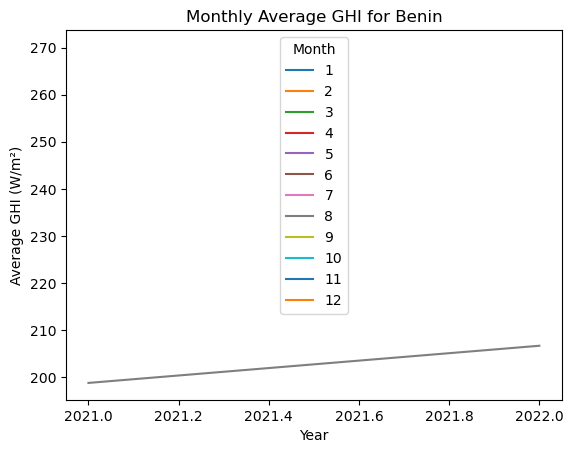

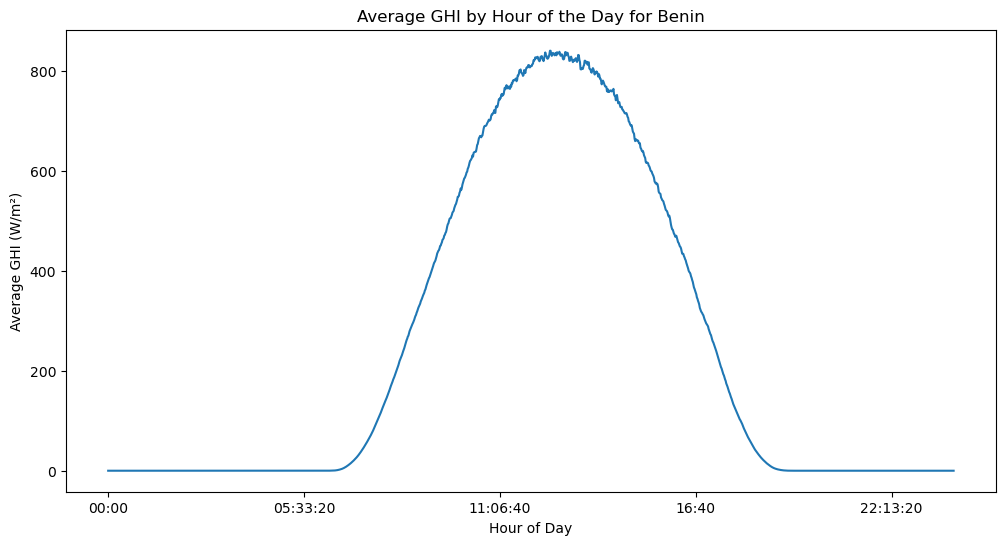

<Figure size 1200x600 with 0 Axes>

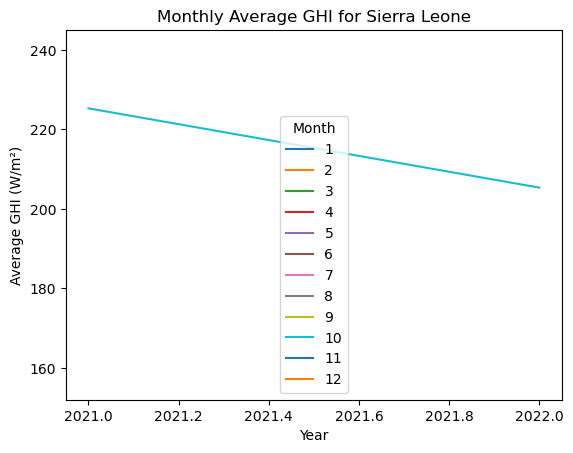

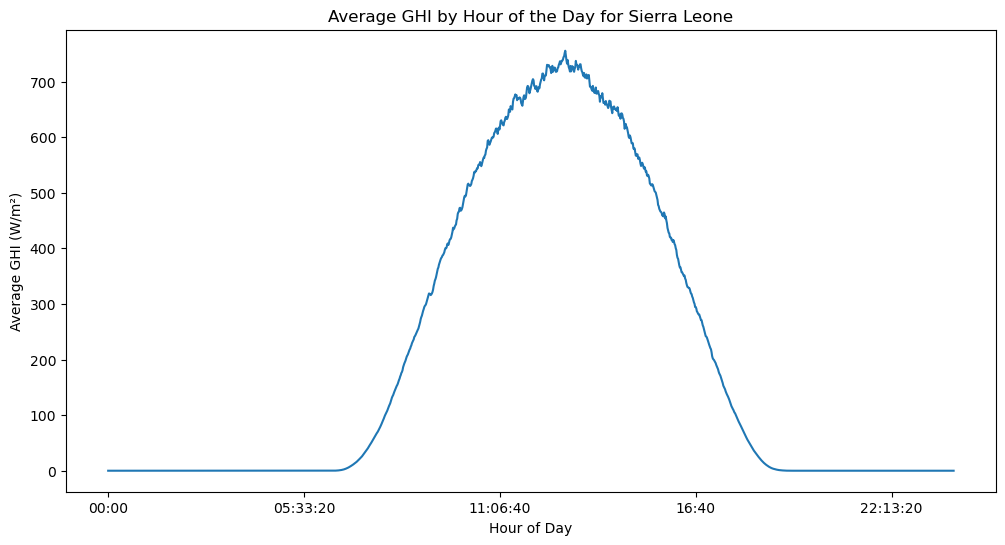

<Figure size 1200x600 with 0 Axes>

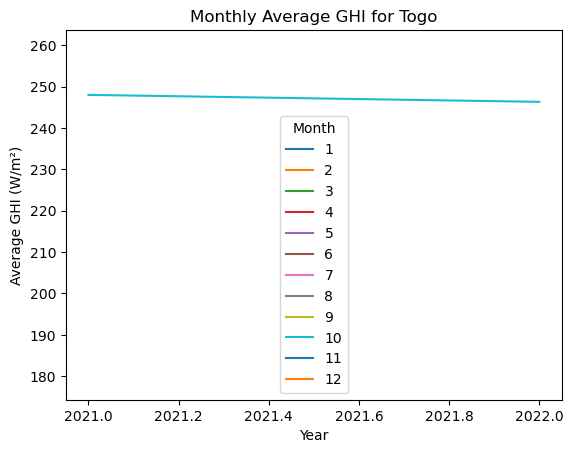

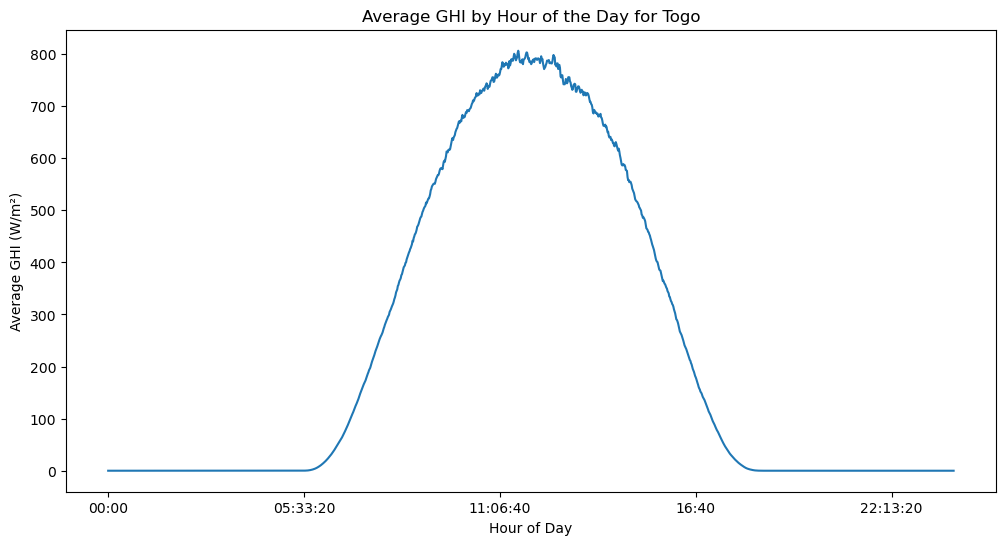

In [28]:

def plot_monthly_average_ghi(df, country_name):
   
    # Check if required columns are in the DataFrame
    if not all(col in df.columns for col in ['Year', 'Month', 'GHI']):
        print(f"Required columns 'Year', 'Month', and 'GHI' not found in the DataFrame for {country_name}.")
        return
    
    # Group by year and month, then calculate the mean GHI
    monthly_ghi = df.groupby(['Year', 'Month'])['GHI'].mean().unstack()
    
    # Plotting
    plt.figure(figsize=(12, 6))
    monthly_ghi.plot()
    plt.title(f'Monthly Average GHI for {country_name}')
    plt.xlabel('Year')
    plt.ylabel('Average GHI (W/m²)')
    plt.legend(title='Month')
    plt.show()

def plot_diurnal_pattern_ghi(df, country_name):
   
    # Check if required columns are in the DataFrame
    if not all(col in df.columns for col in ['Hour', 'GHI']):
        print(f"Required columns 'Hour' and 'GHI' not found in the DataFrame for {country_name}.")
        return
    
    # Group by hour, then calculate the mean GHI
    hourly_ghi = df.groupby('Hour')['GHI'].mean()
    
    # Plotting
    plt.figure(figsize=(12, 6))
    hourly_ghi.plot()
    plt.title(f'Average GHI by Hour of the Day for {country_name}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average GHI (W/m²)')
    plt.show()

# Example usage:
# Assuming 'benin_data', 'sierra_leone_data', and 'togo_data' are your DataFrames

plot_monthly_average_ghi(benin_data, 'Benin')
plot_diurnal_pattern_ghi(benin_data, 'Benin')

plot_monthly_average_ghi(sierraleone_data, 'Sierra Leone')
plot_diurnal_pattern_ghi(sierraleone_data, 'Sierra Leone')

plot_monthly_average_ghi(togo_data, 'Togo')
plot_diurnal_pattern_ghi(togo_data, 'Togo')


#### Anomalies and Outliers

In [29]:
def detect_ghi_anomalies(df, threshold=3):
    
    # Check if 'GHI' column is in the DataFrame
    if 'GHI' not in df.columns:
        print("Column 'GHI' not found in the DataFrame.")
        return
    
    # Calculate Z-score for 'GHI'
    df['GHI_zscore'] = zscore(df['GHI'])
    
    # Identify anomalies based on the Z-score threshold
    anomalies = df[df['GHI_zscore'].abs() > threshold]
    
    # Print the anomalies
    print(anomalies[['Timestamp', 'GHI', 'GHI_zscore']])

# Example usage:
# Assuming 'benin_data', 'sierra_leone_data', and 'togo_data' are your DataFrames

print("Benin Malanville Anomalies:")
detect_ghi_anomalies(benin_data)

print("\nSierra Leone Bumbuna Anomalies:")
detect_ghi_anomalies(sierraleone_data)

print("\nTogo Dapaong Anomalies:")
detect_ghi_anomalies(togo_data)


Benin Malanville Anomalies:
                 Timestamp     GHI  GHI_zscore
671    2021-08-09 11:12:00  1274.0    3.126436
674    2021-08-09 11:15:00  1349.0    3.353639
676    2021-08-09 11:17:00  1334.0    3.308198
849    2021-08-09 14:10:00  1253.0    3.062819
850    2021-08-09 14:11:00  1324.0    3.277905
...                    ...     ...         ...
517777 2022-08-03 13:38:00  1268.0    3.108260
520659 2022-08-05 13:40:00  1280.0    3.144612
520696 2022-08-05 14:17:00  1244.0    3.035555
522074 2022-08-06 13:15:00  1262.0    3.090084
522075 2022-08-06 13:16:00  1289.0    3.171877

[90 rows x 3 columns]

Sierra Leone Bumbuna Anomalies:
                 Timestamp     GHI  GHI_zscore
663    2021-10-30 11:04:00  1119.0    3.081646
671    2021-10-30 11:12:00  1154.0    3.199576
780    2021-10-30 13:01:00  1111.0    3.054691
781    2021-10-30 13:02:00  1126.0    3.105232
782    2021-10-30 13:03:00  1151.0    3.189467
...                    ...     ...         ...
517747 2022-10-24 13:08

### Recommendation and Strategy

#### Identifying High-Potential Regions

In [30]:
def calculate_average_metrics(df):

    # Check if required columns are in the DataFrame
    required_columns = ['Country', 'GHI', 'DNI', 'DHI']
    missing_columns = [col for col in required_columns if col not in df.columns]
    if missing_columns:
        print(f"Columns {missing_columns} not found in the DataFrame.")
        return
    
    # Calculate the average metrics by country
    average_metrics = df.groupby('Country')[['GHI', 'DNI', 'DHI']].mean()
    
    # Print the average metrics
    print("Average Solar Radiation Metrics by Country:")
    print(average_metrics)




# Combine the data
combined_data = pd.concat([benin_data, togo_data, sierraleone_data], ignore_index=True)

# Calculate and print average metrics
calculate_average_metrics(combined_data)


Average Solar Radiation Metrics by Country:
                             GHI         DNI         DHI
Country                                                 
Benin malanville      241.958821  167.441866  116.993033
Togo dapaong          231.718786  151.258469  116.444352
sierra leone bumbuna  204.406778  116.523731  116.273677


In [42]:
def process_and_recommend_investment(benin_data, sierraleone_data, togo_data):
   
    # Concatenate all data into a single DataFrame
    combined_data = pd.concat([benin_data, sierraleone_data, togo_data], ignore_index=True)
    
    # Calculate average metrics by country
    average_metrics = combined_data.groupby('Country')[['GHI', 'DNI', 'DHI']].mean()
    
    # Sort by GHI in descending order and add rank
    average_metrics['Rank'] = average_metrics['GHI'].rank(ascending=False)
    high_potential = average_metrics.sort_values(by='GHI', ascending=False)
    
    # Print high potential countries with their ranks
    print("High Potential Countries based on GHI:")
    print(high_potential)
    
    # Recommendations based on GHI
    top_countries = high_potential.head(3)  # Top 3 countries with highest average GHI
    print("\nRecommended countries for solar investment:")
    for rank, (country, row) in enumerate(top_countries.iterrows(), start=1):
        print(f"Rank {rank}: {country} - Average GHI: {row['GHI']:.2f} W/m²")


# Call the function with the DataFrames
process_and_recommend_investment(benin_data, sierraleone_data, togo_data)


High Potential Countries based on GHI:
                             GHI         DNI         DHI  Rank
Country                                                       
Benin malanville      241.958821  167.441866  116.993033   1.0
Togo dapaong          231.718786  151.258469  116.444352   2.0
sierra leone bumbuna  204.406778  116.523731  116.273677   3.0

Recommended countries for solar investment:
Rank 1: Benin malanville - Average GHI: 241.96 W/m²
Rank 2: Togo dapaong - Average GHI: 231.72 W/m²
Rank 3: sierra leone bumbuna - Average GHI: 204.41 W/m²
